<a href="https://colab.research.google.com/github/rutuja-patil24/CMPE-258-Deep_Learning/blob/main/Assignment_04/a)_Neural_Network_numpy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install TensorFlow
!pip install tensorflow --quiet

In [ ]:
# Import required libraries
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
# Set random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

### Generate Synthetic Data Using a Nonlinear Equation

In [ ]:

num_samples = 1000
x1 = np.random.uniform(-5, 5, num_samples)
x2 = np.random.uniform(-5, 5, num_samples)
x3 = np.random.uniform(-5, 5, num_samples)


In [ ]:
# Define the nonlinear function: y = sin(x1) + cos(x2) + x3^2
y = np.sin(x1) + np.cos(x2) + x3**2

In [ ]:
# Stack inputs into a matrix
X = np.vstack((x1, x2, x3)).T
y = y.reshape(-1, 1)


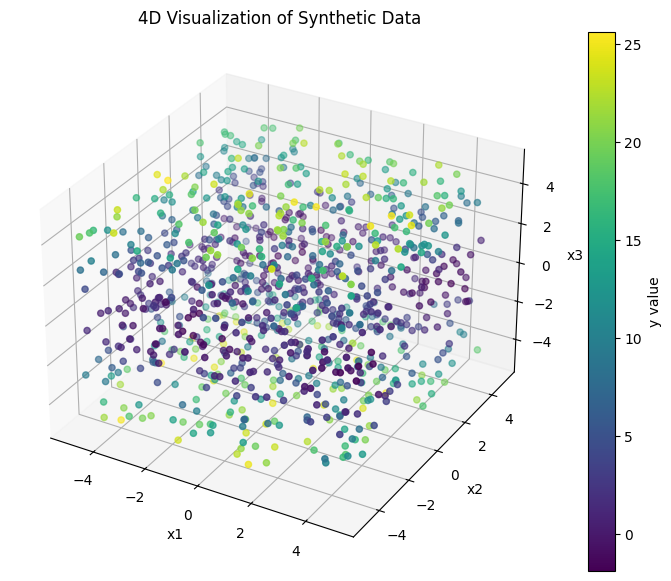

In [ ]:
#4D Visualization of Synthetic Data
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(x1, x2, x3, c=y.flatten(), cmap='viridis')

ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.set_zlabel("x3")
plt.colorbar(sc, label="y value")
plt.title("4D Visualization of Synthetic Data")
plt.show()

### TensorFlow 3-Layer Neural Network Using Einsum

In [ ]:
# Convert NumPy arrays to TensorFlow tensors
X_tf = tf.convert_to_tensor(X, dtype=tf.float32)
y_tf = tf.convert_to_tensor(y, dtype=tf.float32)

In [ ]:
# Define network parameters
input_size = 3
hidden_size1 = 10
hidden_size2 = 5
output_size = 1
learning_rate = 0.01
epochs = 1000


In [ ]:
# Initialize weights and biases in TensorFlow
W1 = tf.Variable(tf.random.normal([input_size, hidden_size1], stddev=0.1), dtype=tf.float32)
b1 = tf.Variable(tf.zeros([hidden_size1]), dtype=tf.float32)
W2 = tf.Variable(tf.random.normal([hidden_size1, hidden_size2], stddev=0.1), dtype=tf.float32)
b2 = tf.Variable(tf.zeros([hidden_size2]), dtype=tf.float32)
W3 = tf.Variable(tf.random.normal([hidden_size2, output_size], stddev=0.1), dtype=tf.float32)
b3 = tf.Variable(tf.zeros([output_size]), dtype=tf.float32)

In [ ]:
# Define activation function
def relu(x):
    return tf.maximum(0.0, x)

# Fixed Loss function (returns a Tensor, not NumPy float)
def mse_loss(y_true, y_pred):
    # Remove dtype keyword, let TensorFlow infer it
    return tf.reduce_mean(tf.square(y_true - y_pred))

In [ ]:
# Training loop
loss_history_tf = []
optimizer = tf.optimizers.SGD(learning_rate)

for epoch in range(epochs):
    with tf.GradientTape() as tape:
        Z1 = tf.einsum('ij,jk->ik', X_tf, W1) + b1
        A1 = relu(Z1)
        Z2 = tf.einsum('ij,jk->ik', A1, W2) + b2
        A2 = relu(Z2)
        Z3 = tf.einsum('ij,jk->ik', A2, W3) + b3
        y_pred = Z3

        loss = mse_loss(y_tf, y_pred)  # Now, loss is a Tensor

        # Compute gradients and update weights
    gradients = tape.gradient(loss, [W1, b1, W2, b2, W3, b3])
    optimizer.apply_gradients(zip(gradients, [W1, b1, W2, b2, W3, b3]))

    loss_history_tf.append(loss.numpy())

    if epoch % 100 == 0:
        print(f"Epoch {epoch}: TensorFlow Loss = {loss.numpy():.6f}")

Epoch 0: TensorFlow Loss = 126.720024
Epoch 100: TensorFlow Loss = 12.666062
Epoch 200: TensorFlow Loss = 9.487793
Epoch 300: TensorFlow Loss = 7.782206
Epoch 400: TensorFlow Loss = 6.527695
Epoch 500: TensorFlow Loss = 5.708812
Epoch 600: TensorFlow Loss = 5.008953
Epoch 700: TensorFlow Loss = 4.488775
Epoch 800: TensorFlow Loss = 4.127896
Epoch 900: TensorFlow Loss = 3.804260


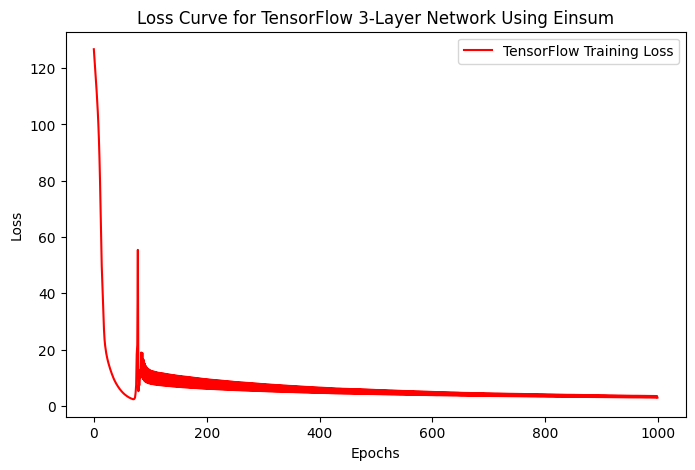

In [ ]:
# Plot the training loss
plt.figure(figsize=(8, 5))
plt.plot(loss_history_tf, label="TensorFlow Training Loss", color='red')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss Curve for TensorFlow 3-Layer Network Using Einsum")
plt.legend()
plt.show()
